# Contour Based Writing- New VUI, Adding Slider, More Colors, New Animation and Code Optimization

## Contents
* [Introduction](#Introduction)
* [Credits](#Credits)
* [Motivation](#Motivation)
* [Dependencies](#Dependencies)
* [VUI: Visual User Interface](#VUI:-Visual-User-Interface)
* [Canvas](#Canvas)
* [Contour Writing](#Contour-Writing)
* [Finally](#Finally)
* [What Next?](#What-Next?)


## Introduction
If i have to write about part, then this is the 4th part or 4th version of <b>Gesture Based Visually Writing System</b>. If you have read my previous blogs on this same topic then you probably know that how much have i progressed from the early version. <b><i>The first best version of anything will be the imporvements of shortcoming.</i></b> I am applying same concept. On previous versions, there were lots of problems, one of them is the structured way of the code. Now on this version, i am using the Object Oriented Way, any concept of OOP will be enough to understand the codes following. And minor image processing concept along with beginner OpenCV knowledge will be enough to know everything about on this blog. But for the better understanding of this project requires <b>primary prerequisite to understand the concepts and algorithms used on this blog are to view my previous blogs</b>. Because i am explaining little this time. Follow the [Before Anything](#Before-Anything) section for more information.

### What now?
* Now on this blog, i will be sharing new and more optimized and scalable way of writing codes to perform this task. I am introducing the OOP way.
* I will also add new mode. And that mode is the most essential one. A slider to change size of a pointer.

The entire system can be divided onto 3 parts. And if i have to make a diagram then it will be something like below.
<img src="Assets/oop.png">

### VUI
A class representing Visual User Interface, which will lie above the canvas and it contains icons, and interacting panel. Some common methods are written inside the box and the communication medium between the classes is vai object and sometimes attributes. One example of communication is, the class Contour Writing sends the current location of pointer to VUI and VUI shows the pointer on VUI region (if lies). Then the view applies animation on icons, and tries to set mode. Then VUI's current window is sent back along with running mode.

### Canvas
A class representing writing place. Contour writing sends thep pointer location and running mode and the operation happens on canvas. Operations generally are Draw. erase and move. Finally, the written canvas is sent back.

### Contour Writing
A class that handles all other classes and performs contour extraction task using OpenCV. This class is responsible for many things and one of them is pointer assignment.

### Before Anything
Before anything, i am requesting you to view my previous blogs and only then return to this blog. Because the blogs below are the earlier version of the codes and concepts. I am still using same concepts and also you will be amazed to see how much i have progressed. I am only going to describe what is happening here on very little. Hence, if you are new to this project then it is best idea to view them. Please view them serially.
* [Gesture Based Visually Writing System Using OpenCV and Python](https://acharyaramkrishna.com.np/2020/08/01/gesture-based-visually-writing-system-using-opencv-and-python/)
* [Gesture Based Visually Writing System: Adding Visual User Interface](https://acharyaramkrishna.com.np/2020/08/11/gesture-based-visually-writing-system-make-a-visual-user-interface/)
* [Gesture Based Visually Writing System: Adding Virtual Animationn, New Mode and New VUI](https://acharyaramkrishna.com.np/2020/08/14/gesture-based-visually-writing-system-adding-virtual-animation-new-mode-and-new-vui/)

## Credits
I want to give credits of this blogs to everyone on [LinkedIn](https://linkedin.com/in/ramkrishna-acharya-91a217183/) who reacted, shared and commented my previous blog and on [Twitter](https://twitter.com/QuassarianViper) also (most of retweets was from bots lol). I am very grateful that my [this LinkedIn post about previous version](https://www.linkedin.com/posts/ramkrishna-acharya-91a217183_opencv-computervision-python-activity-6699919193124548608-bJI-) got more than 2.2k reactions and nearly 30k views. I never thought that this will gain so much attention and here i am improving it again. 
If i have to take a name and reason for credits:-
* [Sagar Dhungel](https://www.linkedin.com/in/sagardhungel/): Who motivates me to write more.
* [Suraj Bista](https://www.linkedin.com/in/suraj-bista-282830126): Who motivates me to write more.
* [Pitambar Mahato](https://www.linkedin.com/in/pitambar-mahato-245621140/): Who reads my all blogs and gives feedbacks.
* [Kamal Gautam](https://): Who reads my all blogs and gives feedbacks.
* [Indra Poudel](https://): Who helped me find issues on blogs.

## Motivation
I am highly motivated by the support people gave me on [LinkedIn](https://www.linkedin.com/posts/ramkrishna-acharya-91a217183_opencv-computervision-python-activity-6699919193124548608-bJI-).

## Dependencies
As usual, importing dependencies on earlier of the code run.

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import imutils

def show(img, figsize=(10, 10)):
    figure = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()

## VUI: Visual User Interface
I don't know if the term VUI for Visual User Interface is already used and if this term is right one now to use. But i am using it anyway on the purpose that we are interacting with video frames. This time instead of a simple variable, i am using a new and robust way of defining VUI. A VUI Class.

### Initialize Class
The class is initialized with default parameters and setting useful parameters ahead of program run.

```python
class VUI:
    """
        A class for visual user interface. Recommended to use default parameters.
    """
    def __init__(self, icons_dir="icons/", window_size=(525, 700, 3), vui_part=20):
        """
            icons_dir: directory to use icons from.
            window_size: size of an vui window. Recommended to use equal of final window.
            vui_part: How much % of rows from top will be used to stack icons?
        
        """
        self.idir = icons_dir
        self.window = np.zeros(window_size).astype(np.uint8)
        self.size = window_size
        self.vui_part = int(vui_part/100 * self.size[0])
        self.dd_part = (self.vui_part, int(50/100 * self.size[0]))
        
        self.modes = [fname.split(".")[0] for fname in os.listdir(self.idir)]
        self.icon_size = (int(self.size[1]/len(self.modes)), self.vui_part) # c, r
        
        self.current_icons = []
        self.anim_scale = 0.5
        self.anim_color = [5, 15, 2]
        self.prev_mode = "move"
        self.current_mode = "move"
        self.running_mode = None 
        self.hover=None
        
        self.mode_count = 1
        self.max_count = 5
        self.color_count = 1
        self.max_color = 5
        
        self.current_pointer = (100, 100)
        self.canvas_pointer = None
        
        self.draw_color = (0, 0, 255)
        self.previous_color = (0, 0, 255)
        self.current_color = (0, 0, 255)
        self.pointer_color = (100, 200, 200)
        self.point = (10, -3)
        self.colors=None
        
        self.icons = self.prepare_icons()
        self.get_window()
```

* `idir`: holds icons directory.
* `window`: holds VUI window. Initally blank image.
* `vui_part`: how much of rows from top row to use for icons?
* `dd_part`: how much of the rows from top row to use for dropdown?
* `modes`: available modes. Normally name of the images under idir.
* `icon_size`: size of each icon on vui_part. Format (cols, rows).
* `current_icons`: list to store icons on every frame.
* `anim_scale`: animation scale. How to increase/decrease the icon size?
* `anim_color`: animation color for icons
* `prev_mode`: previous mode, default is move.
* `current_mode`: current mode, default is move.
* `running_mode`: running mode, default is None.
* `hover`: if cursor is above vui region.
* `mode_count`: count number of times pointer contiously lied above current icon. Default 1.
* `max_count`: how many times current mode be repeated to change running mode to current mode?
* `color_count`: same as mode_count but for color.
* `max_count`: same as max_count but for color.
* `current_pointer`: where is pointer located currently? value modified by other classes.
* `canvas_pointer`: where is pointer right now on canvas?
* `draw_color`: current draw color. Red default.
* `previous_color`: where did cursor lied on previous dropdown of color?
* `current_color`: where is cursor lying on current dropdown of color?
* `pointer_color`: which color should the pointer be of.
* `point`: value to tune pointer size. (radius, thickness)
* `colors`: list of colors in RGB for chosing colors
* `icons`: value set by method `prepare_icons`.

Each and every attribute has its own usecase and i tried to make it lesser. Some variables like count, current/previous are important to change modes/colors so they must be tuned properly. 



### Method: Prepare Icons
A method to prepare icons and their respective modes. It is called initially while class initialization.
```python
    def prepare_icons(self):
        """
            A method to prepare icons on initial frame.
            Method sets 4 new attributes.
            cols: List to store (y1, y2) of icon.
            icon_position: Dictionary to store (y1, y2) as key and corresponding image as value
            current_icons: A dictionary initialized with initial icons. Changed on every frame when cursor lies above it.
            mode_pos: Mode as key and its icon's (y1, y2) as value.
        """
        cols = np.linspace(0, self.size[1]-1, len(self.modes)+1).astype(np.int64)
        cols = [(cols[i], cols[i+1]) for i in range(len(cols)-1)]
        
        icon_pos = {}
        mode_pos = {}
        for i, image_name in enumerate(os.listdir(self.idir)):
            img = cv2.imread(self.idir+image_name)
            img = cv2.resize(img, (cols[i][1]-cols[i][0], self.vui_part))
            icon_pos[cols[i]] = img
            mode_pos[self.modes[i]] = cols[i]
        self.cols = cols   
        self.icon_position = icon_pos
        self.current_icons = icon_pos
        self.mode_pos = mode_pos
```
#### What is happening here?
* Method starts by creating an array of columns for icons. If we have 9 icons, then to stack them how many lines are required? 10.
* Then we modify that array into list of tuple. Store (y1, y2) for each column.
* Initialize dictionaries `icon_pos` and `mode_pos`.
* For each image on icons directory:
    * Read image and resize it to shape that fits completely on cols.
    * Store img on `icon_pos`, key be cols and value be image.
    * Store cols on `mode_pos`, key as mode name and value as cols.
* Make attributes for `cols`, `icon_position`, `current_icons`, `mode_pos`.
    

### Method: Set Colors
This method is used to change the color of pointer/draw when pointer lies above it for some frames. We can change color from dropdown menu. Colors are either provided from outside of use default.
```python
    def set_colors(self, col=None, new_colors=None):
        """
            A method to set colors when pointer lies above color icon.
            Initially used subset of {Red, Green, Blue}
            col:- column where current pointer lies.
            new_colors:- If to use other colors.
            
            Method returns list of available colors on dropdown menu. 
            Changes the draw color, pointer color upon condition meet.
        """
        # earlier pointer was clipped within the vui
        pointer = self.canvas_pointer
        pointer = (pointer[1], self.vui_part+ pointer[0])
        if new_colors is None:
            r = np.array([0, 0, 255])
            g = np.array([0, 255, 0])
            b = np.array([255, 0, 0])
            colors = [r, g, b]
            colors_new = [colors[i]+colors[i+1] for i in range(len(colors)-1)]
            colors.extend(colors_new)
            self.colors = colors
        else:
            self.colors = new_colors
        rows = np.linspace(self.dd_part[0], self.dd_part[1], len(self.colors)+1).astype(np.int64)
        rows = [(rows[i], rows[i+1]) for i in range(len(rows)-1)]
        self.color_pos = {}
        for row, color in zip(rows, colors):
            self.color_pos[row] = color
            if row[0]<=pointer[1]<row[1] and col[0]<=pointer[0]<col[1]:
                self.current_color = (color.tolist())
                if self.current_color == self.previous_color:
                    self.color_count+=1
                else:
                    self.previous_color=self.current_color
                    self.color_count = 1
                if self.color_count>=self.max_color:
                    self.draw_color=self.current_color
                self.pointer_color = (np.abs(np.array([200, 200, 100])-color).tolist())
            self.current_window[row[0]:row[1], col[0]:col[1]] = color
        
        return self.colors
```
* Method takes the pointer as canvas's pointer because we only use the pointer of VUI on `vui_part` only.
* We edited the pointer to make it fit on our case. The swapping is require because we have pointer on (y, x) format mostly.
* We initialize `colors` from condition checks.
* Since colors are chosed form dropdown, colors are stackked top to down. Hence find rows that divides colors.
* If current pointer's x coordinate lies within any of color's row then the `color_count` is increased.
* When `color_count` reaches `max_count` we change the pointer color and draw color.
* We also have to change the window's color on those region where current color's position is.

### Method: Get window
This method is called from other methods.
```python
    def get_window(self):
        """
            A method to return a VUI window upon called. Sets pointer on VUI canvas.
        """
        self.current_window = np.zeros_like(self.window).astype(np.uint8)
        for col, img in self.current_icons.items():
            self.current_window[:self.vui_part, col[0]:col[1]] = img
        if self.running_mode == "color":
            self.set_colors(col=self.cols[self.modes.index("color")])
        if self.current_pointer is not None and self.current_pointer[0]>0:
            cv2.circle(self.current_window, (self.current_pointer[1], self.current_pointer[0]), self.point[0], self.pointer_color, self.point[1])
        
        return self.current_window
```
* Starts by initializing new blank image.
* Loop through `current_icons`'s key and values, set the icon image on exact position of `vui_part`.
* When `running_mode` is color we have to show dropdown hence call `set_colors` method and pass the column where current pointer is.
* Finally draw a pointer on window and return.

### Method: Update VUI
This method is called from the main class of writing. Method performs too many things here. This method calls other methods also to perform operations like changing color, changing mode etc.
```python
    def update_vui(self, pointer=(100, 100), cpointer=(10, 100)):
        """
            A method to update the entire VUI properties and state.
            pointer: Current pointer on VUI part.
            cpointer: Current pointer on Canvas.
            
            cpointer is useful when working with color mode.
        """
        self.current_pointer = pointer
        self.canvas_pointer = cpointer
        #print(pointer, canvas_pointer)
        current_icons = {}
        self.hover=None
        if pointer[0]<=self.vui_part:
            for col, mode in zip(self.cols, self.modes):
                icon = self.icon_position[col].copy()
                ishape = icon.shape
                
                #print(mode)
                if col[0]<pointer[1]<=col[1]:
                    # pointer is above this icon now animate it.
                    self.current_mode = mode
                    zeros_icon = np.zeros_like(icon).astype(np.uint8)
                    
                    f = self.anim_scale*self.mode_count
                    r = int(ishape[0] * f)
                    c = int(ishape[1] * f)
                    icon = cv2.resize(icon, (c, r))
                    if f > 1:
                        rd = int((r - ishape[0])/2)
                        cd = int((c - ishape[1])/2)
                        
                        zeros_icon[:, :] = icon[rd:ishape[0]+rd, cd:ishape[1]+cd] 
                    else:
                        rd = int((ishape[0] - r)/2)
                        cd = int((ishape[1] - c)/2)
                        rdd, cdd = 0, 0
                        if ishape[0]-rd-rd > r:
                            rdd=1
                        if ishape[1]-cd-cd > c:
                            cdd=1
                        #print(icon.shape, ishape, rd, abs(r-rd), cd, abs(c-cd))
                        zeros_icon[rd:ishape[0]-rd-rdd, cd:ishape[1]-cd-cdd] = icon[::] 
                            
                    current_icons[col] = zeros_icon.astype(np.uint8) + np.uint8(np.array(self.anim_color)*self.mode_count)
                    
                    
                    if self.prev_mode == self.current_mode:
                        self.mode_count += 1
                    else:
                        self.prev_mode = self.current_mode
                        self.mode_count = 1
                    if self.mode_count >= self.max_count:
                        self.running_mode = self.current_mode
                        self.mode_count = 1
                        self.hover = True
                        
                else:
                    current_icons[col] = icon
                
            self.current_icons = current_icons
        else:
            self.mode_count = 1
                    
        return self.get_window()
```

* Take `vui_pointer` and set it to `current_pointer`. 
* Take `canvas_pointer` and set it too.
* Initialize dictionary to store `current_icons`. We store the changed icon here along with unchanged.
* Initialize `hover` to None.
* Proceed below only when current x axis lies below the `vui_part`. i.e if pointer is on icons panel.
* Loop through columns of icons and modes at same time.
    * Take icon lying on this column.
    * If current pointer's column lies within the columns:
        * Set current mode.
        * Create blank image of icon shape as `zeros_icon`. 
        * Find the scale factor by multiple of mode counts.
        * Find new row/column for this icon. We are scaling icon to make it look like animating.
        * Make new icon's center and original icon's center same and insert it into blank image.
        * Store `zeros_icon` on `current_icons`.
        * Perform count checkings. And change mode when mode count reaches max. Set hover to True.
    * Else:
         * Store icon on `current_icon`. Because pointer is not above this icon so leave it as it is.
* Return the output of `get_window` method.

### Test Class: VUI
To test the class, we will call the method `update_vui` by passing it a pointer. To make sure our dropdown is working fine i will set pointer to color's region. And to show animating like effect, i will call it multiple times. See the result below.

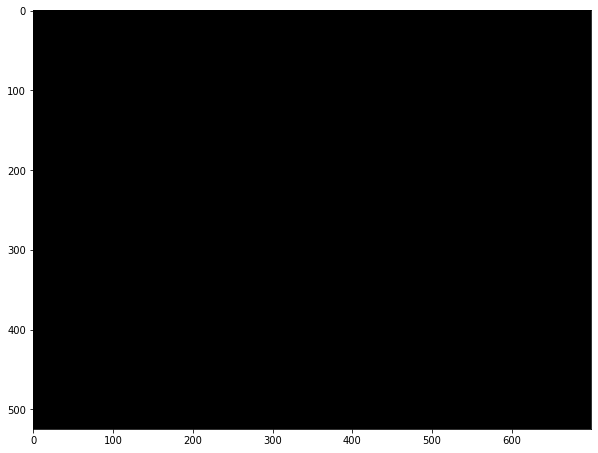

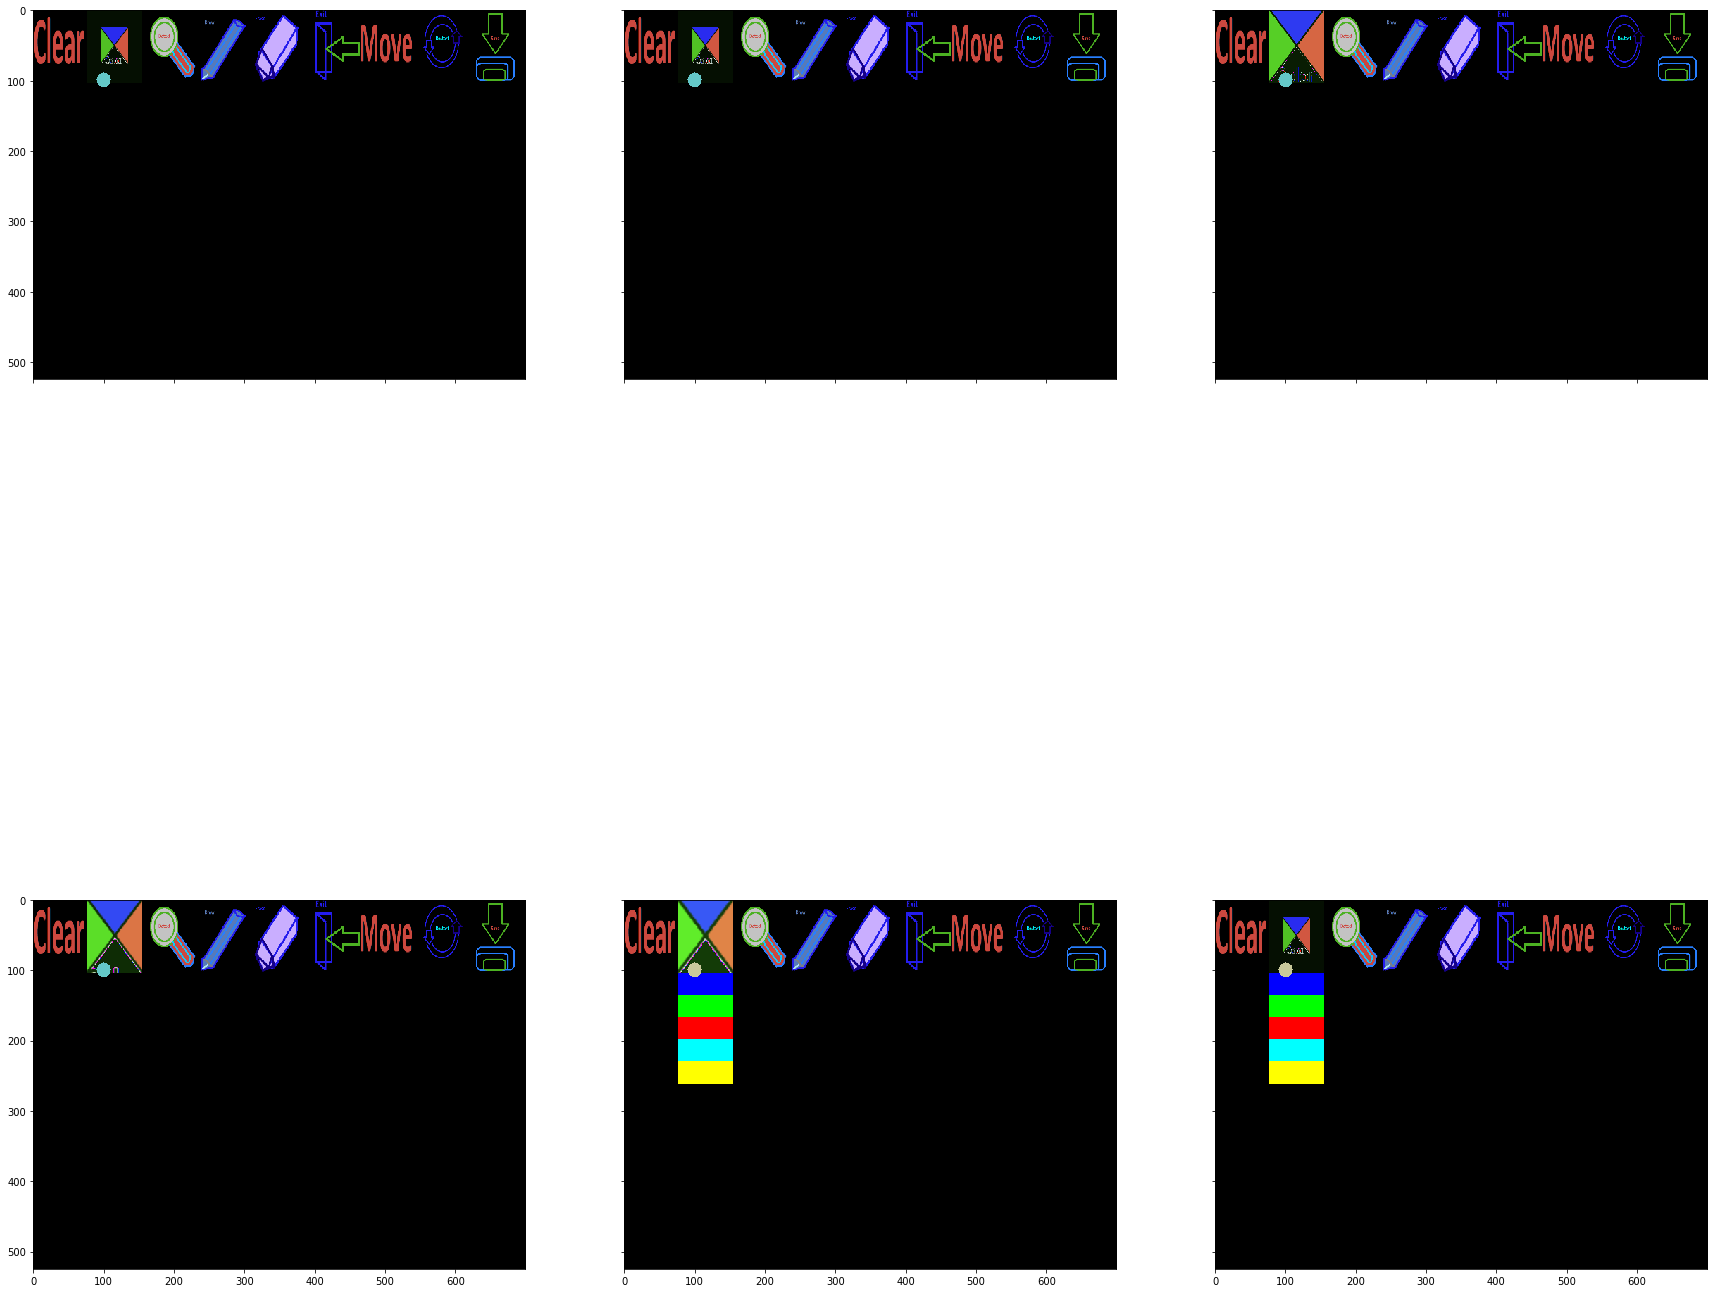

In [27]:
vui = VUI()
show(vui.window)

fig = plt.figure(figsize=(30, 30))
ax = fig.subplots(2, 3, sharex='col', sharey='row')

for i in range(2):
    for j in range(3):
        ax[i][j].imshow(vui.update_vui())


From above image, it is clear that our dropdown is working fine and the icon is also changing its color and size at the same time. Hence test passed.

## Canvas
The canvas we will use will also be a class. It is not much complicated than VUI class because its task is to only write/erase on that position where pointer lies. Erase is much easier if we specified the background color eariler and whenever the pointer lies, draw a circle there with background color.

### Initialize: Canvas
Initialize a class with default and essential parameters. Follow the docstring for more information.
```python
class Canvas:
    def __init__(self, window_size=(525, 700, 3), draw_color=(100, 100, 100), 
                 pointer_color=(0, 0, 0), bg_color=(25, 25, 25), mode="move", 
                 point=(10, -3), vui=None, ssize=(300, 50, 3)):
        """
            A method to initialize canvas.
            window_size: size of a canvas window.
            draw_color: drawing color in RGB.
            pointer_color: pointer color in RGB.
            bg_color: background color in RGB.
            mode: running mode.
            point: tuple of (pointer radius, thickness)
            vui: VUI object.
            ssize: Slider's size.
        
        """
        self.size=window_size
        self.draw_color=draw_color
        self.pointer_color = pointer_color
        self.bg_color = bg_color
        self.window = np.zeros(self.size, dtype=np.uint8)
        self.canvas= self.window.copy()+bg_color
        self.mode = mode
        self.pointer = None
        self.point = point
        self.current_window = self.window+self.canvas
        self.vui = vui
        self.ssize = ssize
        self.sregion = ()
```
* Canvas is initialized with background color.
* Current window must include the pointer and the real canvas. 


### Method: Update Window
A method which performs draw/erase/move on canvas and shows pointer.
```python
    def update_window(self, mode, pointer=(400, 100)):
        """
            mode: running mode
            pointer: where is pointer now?
        """
        self.mode = mode
        self.vui.mode=mode
        self.pointer = pointer
        self.draw_color=self.vui.draw_color
        self.pointer_color = self.vui.pointer_color
        #self.pointer = (np.clip(self.vui.vui_part, pointer[0], self.size[0]), pointer[1])
        #print("c", self.draw_color)
        swindow = np.zeros(self.size).astype(np.uint8)
        #print(pointer)
        if 0<pointer[0]<self.ssize[0] and 0<pointer[1]<self.ssize[1]:
            swindow=self.slider(spoint=pointer[0])
            self.mode = "move"
                      
        if self.mode == "draw":
            cv2.circle(self.canvas, (self.pointer[1], self.pointer[0]), self.point[0], self.draw_color, self.point[1])
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        elif self.mode == "erase":
            cv2.circle(self.canvas, (self.pointer[1], self.pointer[0]), self.point[0], self.bg_color, self.point[1])
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        else:
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        #show(self.canvas)
        #show(self.current_window)
        return self.current_window
```
* Some attributes are set initially from VUI object and parameters.
* Initialize slider to blank image.
* When pointer lies on slider region, then call slider window and change mode to move.
* If mode is draw, 
    * Draw circle on pointer position with current properties of draw on canvas. 
    * Create current window.
    * Draw circle on current window with pointer color.
* If mode is erase,
    * Draw circle on pointer position with current properties of draw on canvas. i.g background color
    * Create current window.
    * Draw circle on current window with pointer color.
* Else:
    * Create current window and draw a circle on pointer position with pointer color. 
* Return current window.

### Method: Slider
This is new concept on this version. I am using slider to change the size of pointer. Isn't it interesting?
```python
     def slider(self, size=(300, 30, 3), spoint=50, scolor=(100, 55, 100)):
        """
            A method to change the pointer size by moving a slider.
            size: size of slider region.
            spoint: slider point, generally row position of pointer.
            scolor: slider color
        """
        swidth=10
        #swidth=int(5/50*spoint)
        #swidth = np.clip(swidth, 5, spoint)
        swindow=np.zeros(self.size).astype(np.uint8)
        swindow[:self.ssize[0], 0:self.ssize[1]] += np.uint8([255, 255, 255])  
        r1 = np.clip(spoint-swidth, swidth, self.ssize[0]-swidth)
        r2 = np.clip(spoint+swidth, swidth, self.ssize[0]-swidth)
        spoint = int(10/50 * spoint)
        #print(r1, r2, spoint)
        
        
        swindow[r1:r2, :self.ssize[1]] = scolor
        self.point=(spoint, self.point[1])
        #cv2.imshow("slider", swindow.astype(np.uint8))
        return swindow.astype(np.uint8)   
```
* Method starts by defining new variable `swidth`, which is slider width.
* New blank image is made to store slider.
* Slider is made by making a rectangle on the spoint row, we add width on both top/bottom of slider.
* Change our pointer size relative to the the slider position.
* Return the slider window.

### Method: Clear
A method to clear the window and canvas when clear mode is enabled.
```python
    def clear(self):
        self.window = np.zeros(self.size, dtype=np.uint8)
        self.canvas= self.window.copy()+self.bg_color
```
Both canvas and window is returned to their original state.

### Test: Canvas
Lets test our canvas. The output should look like below. I am testing it to work with slider and draw both.

Draw with normal pointer move.


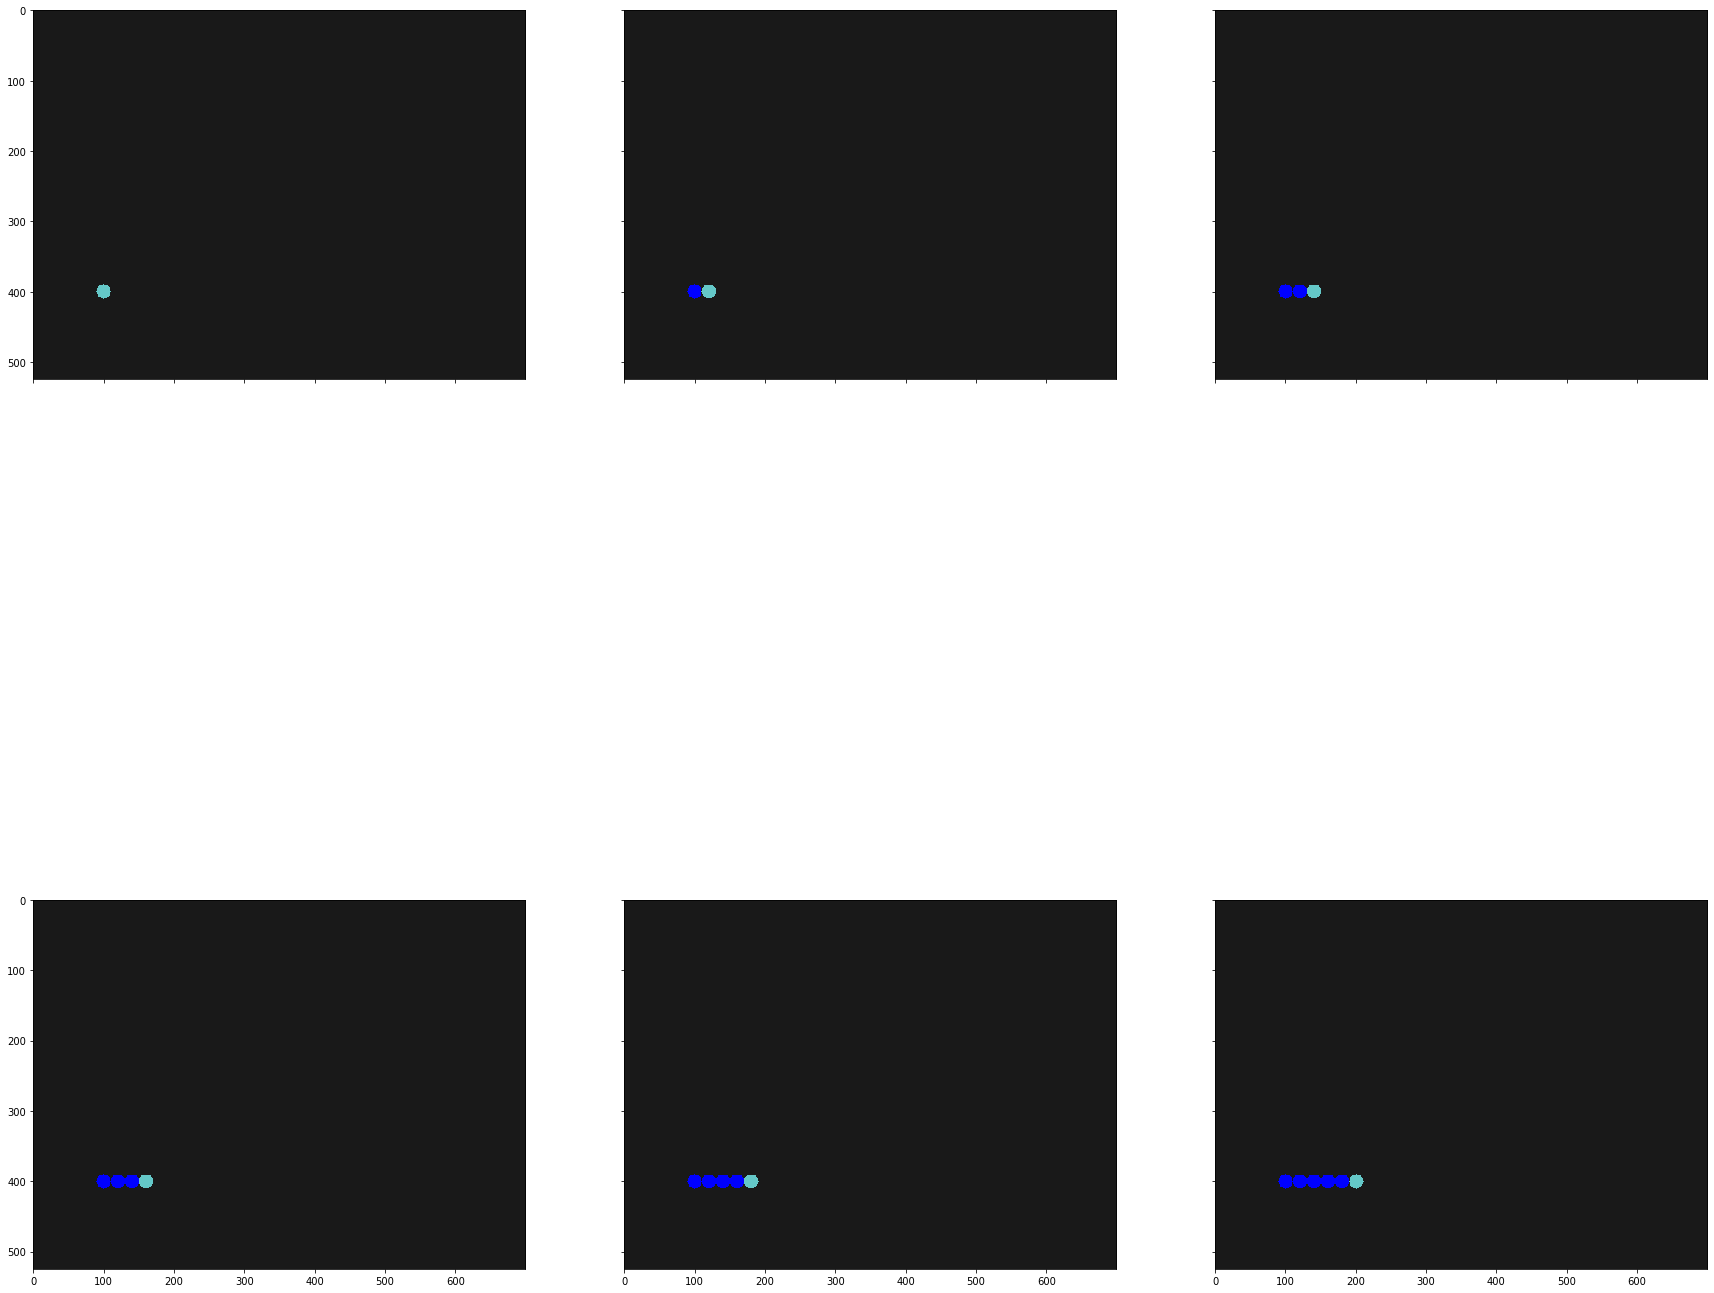

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Draw with slider move.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


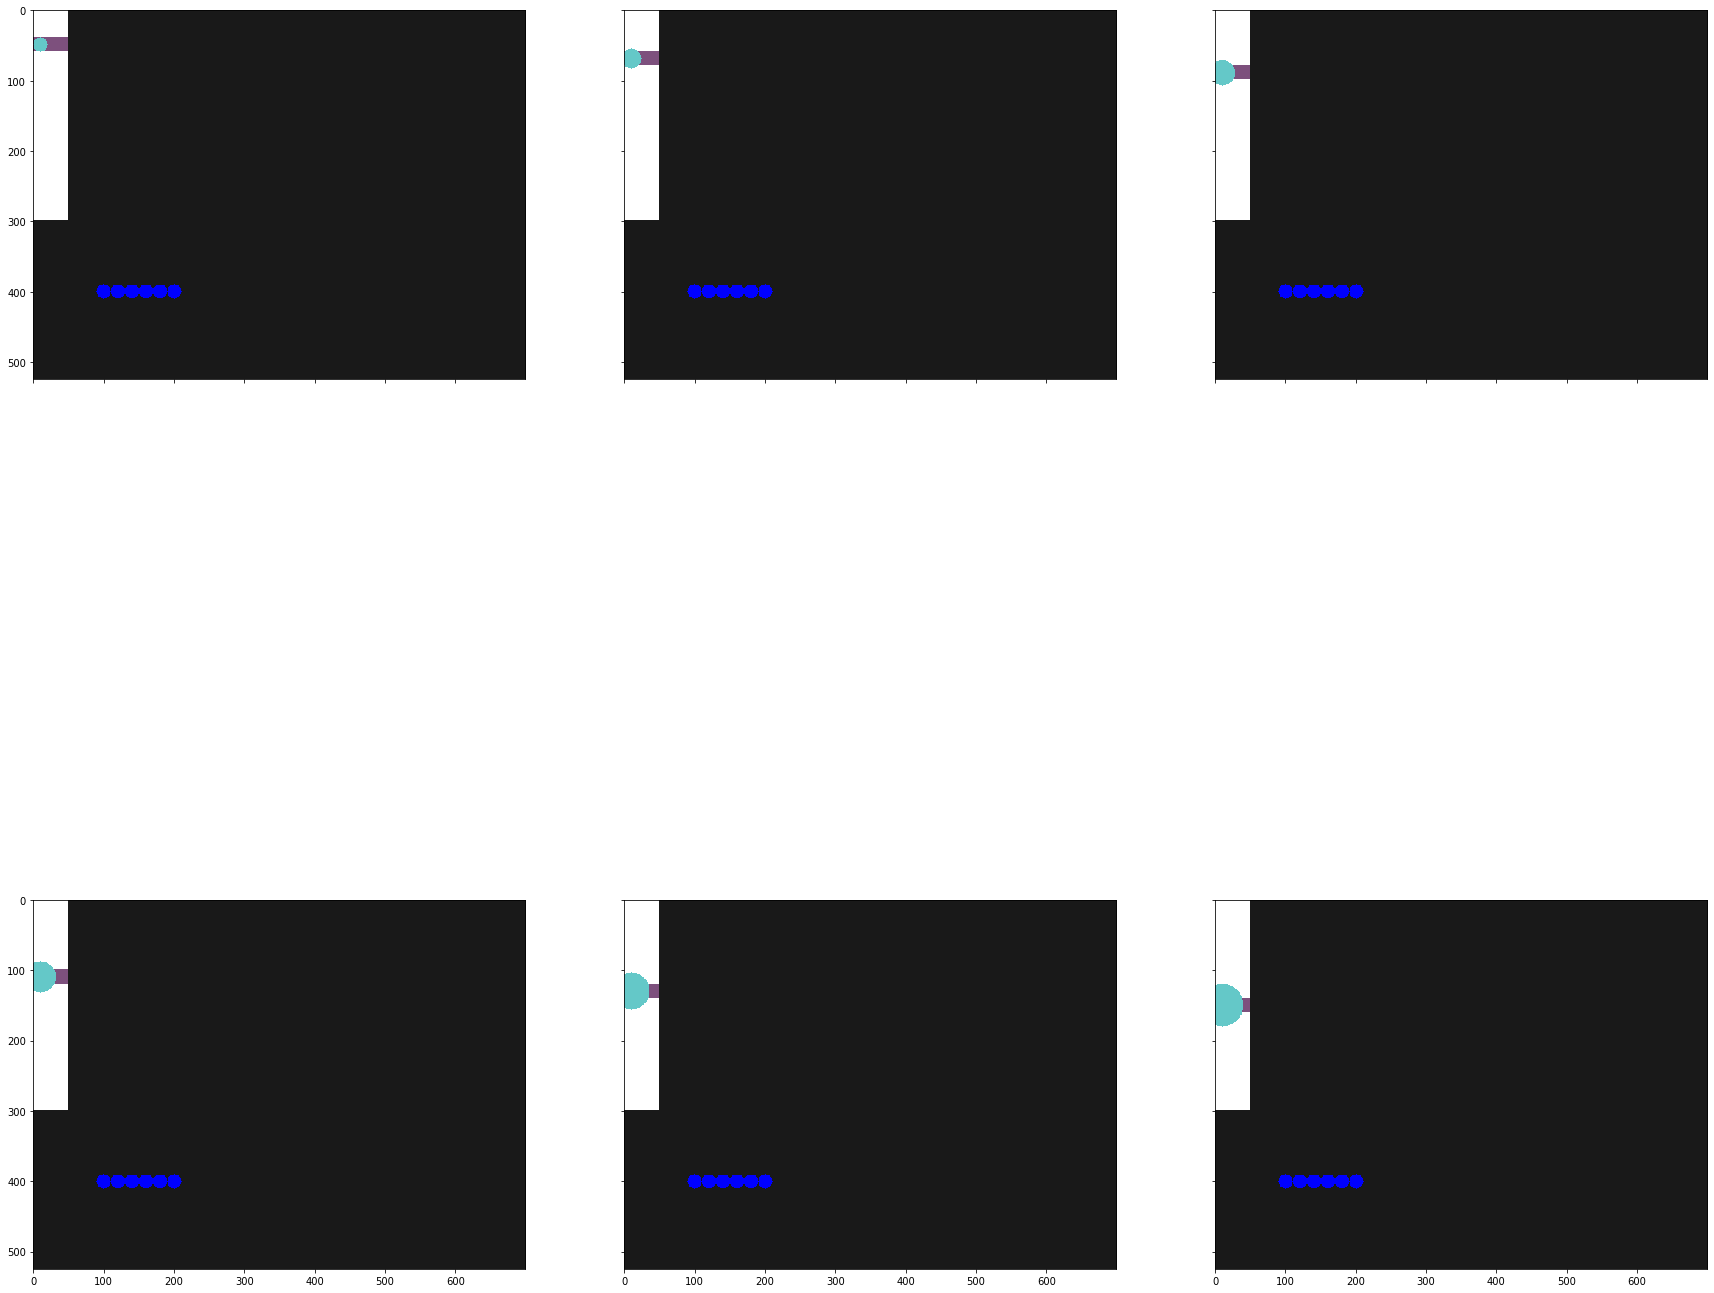

Draw with new pointer.


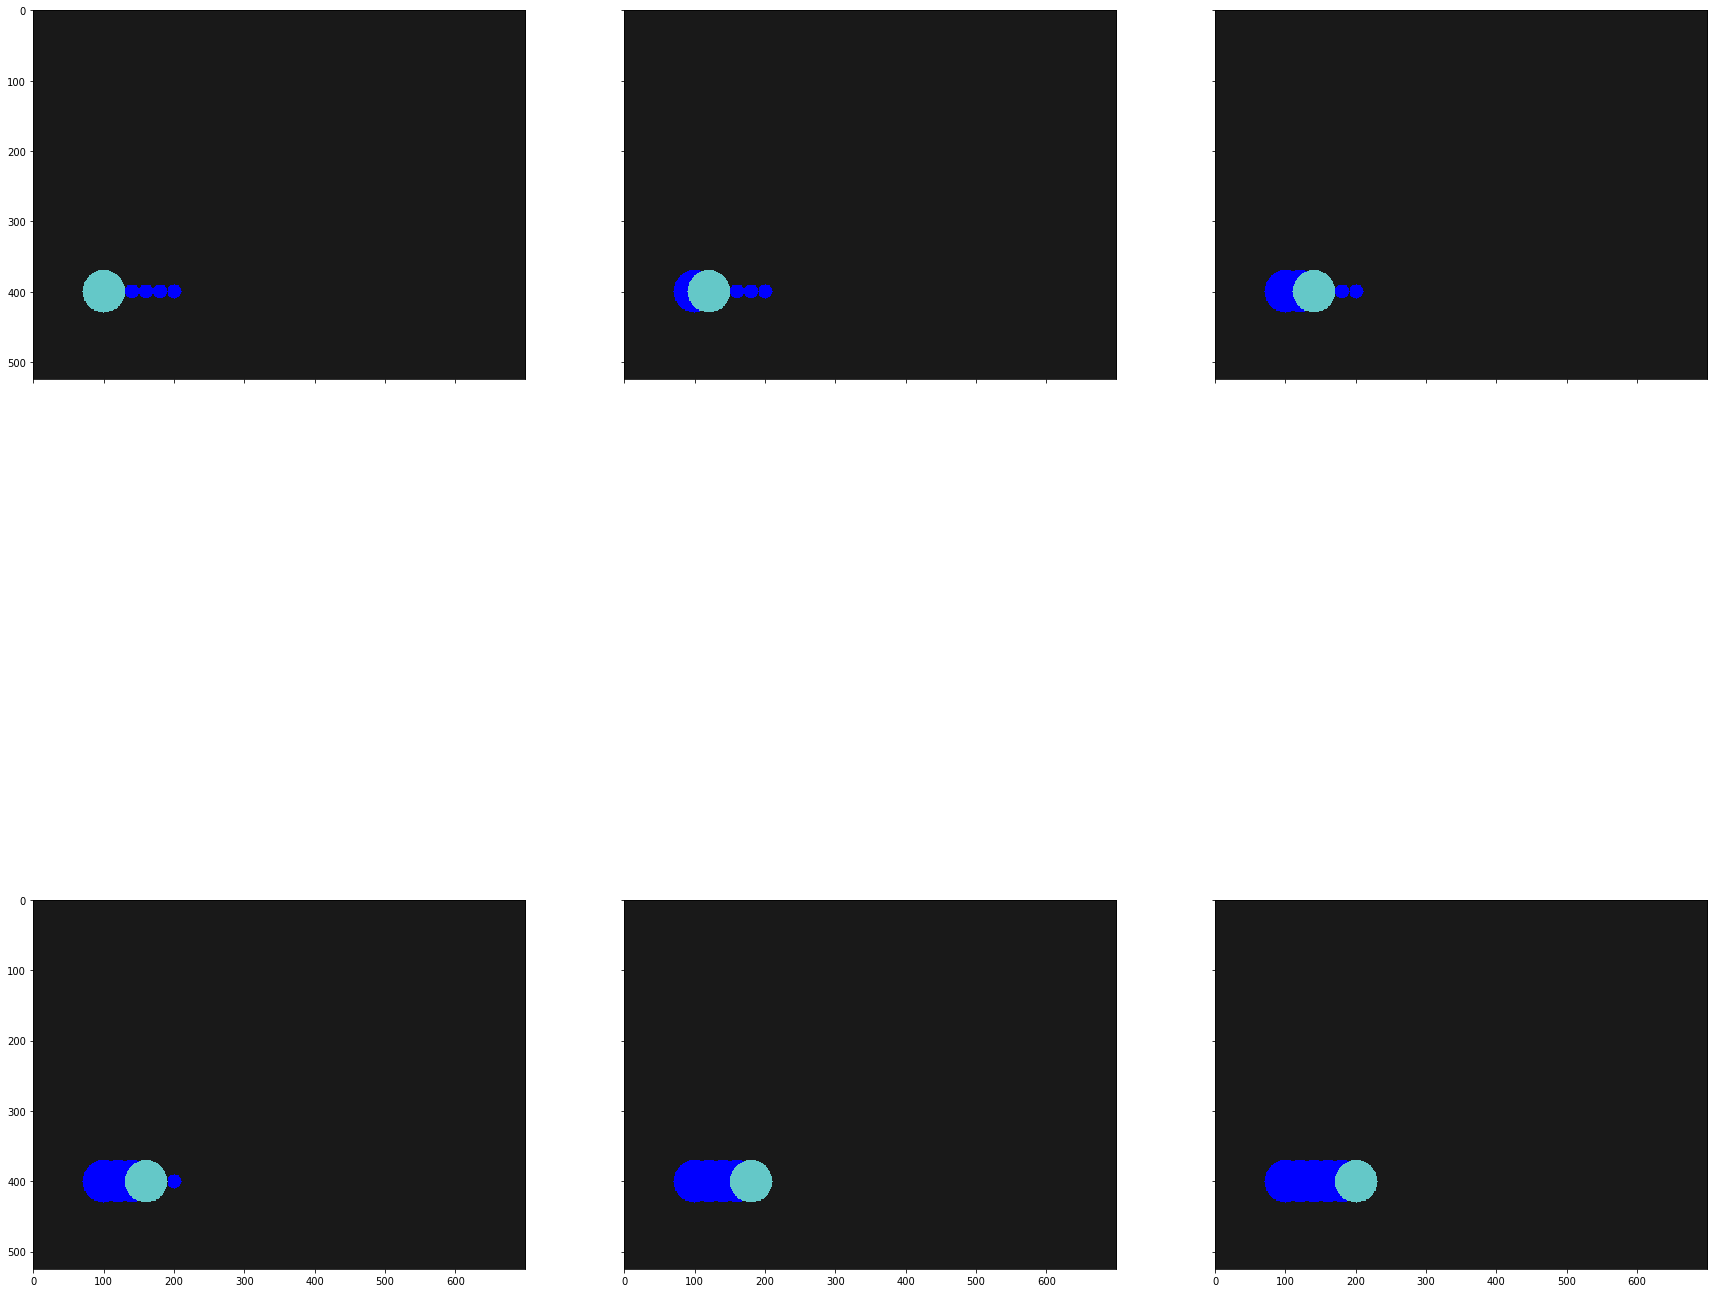

Erase with new pointer.


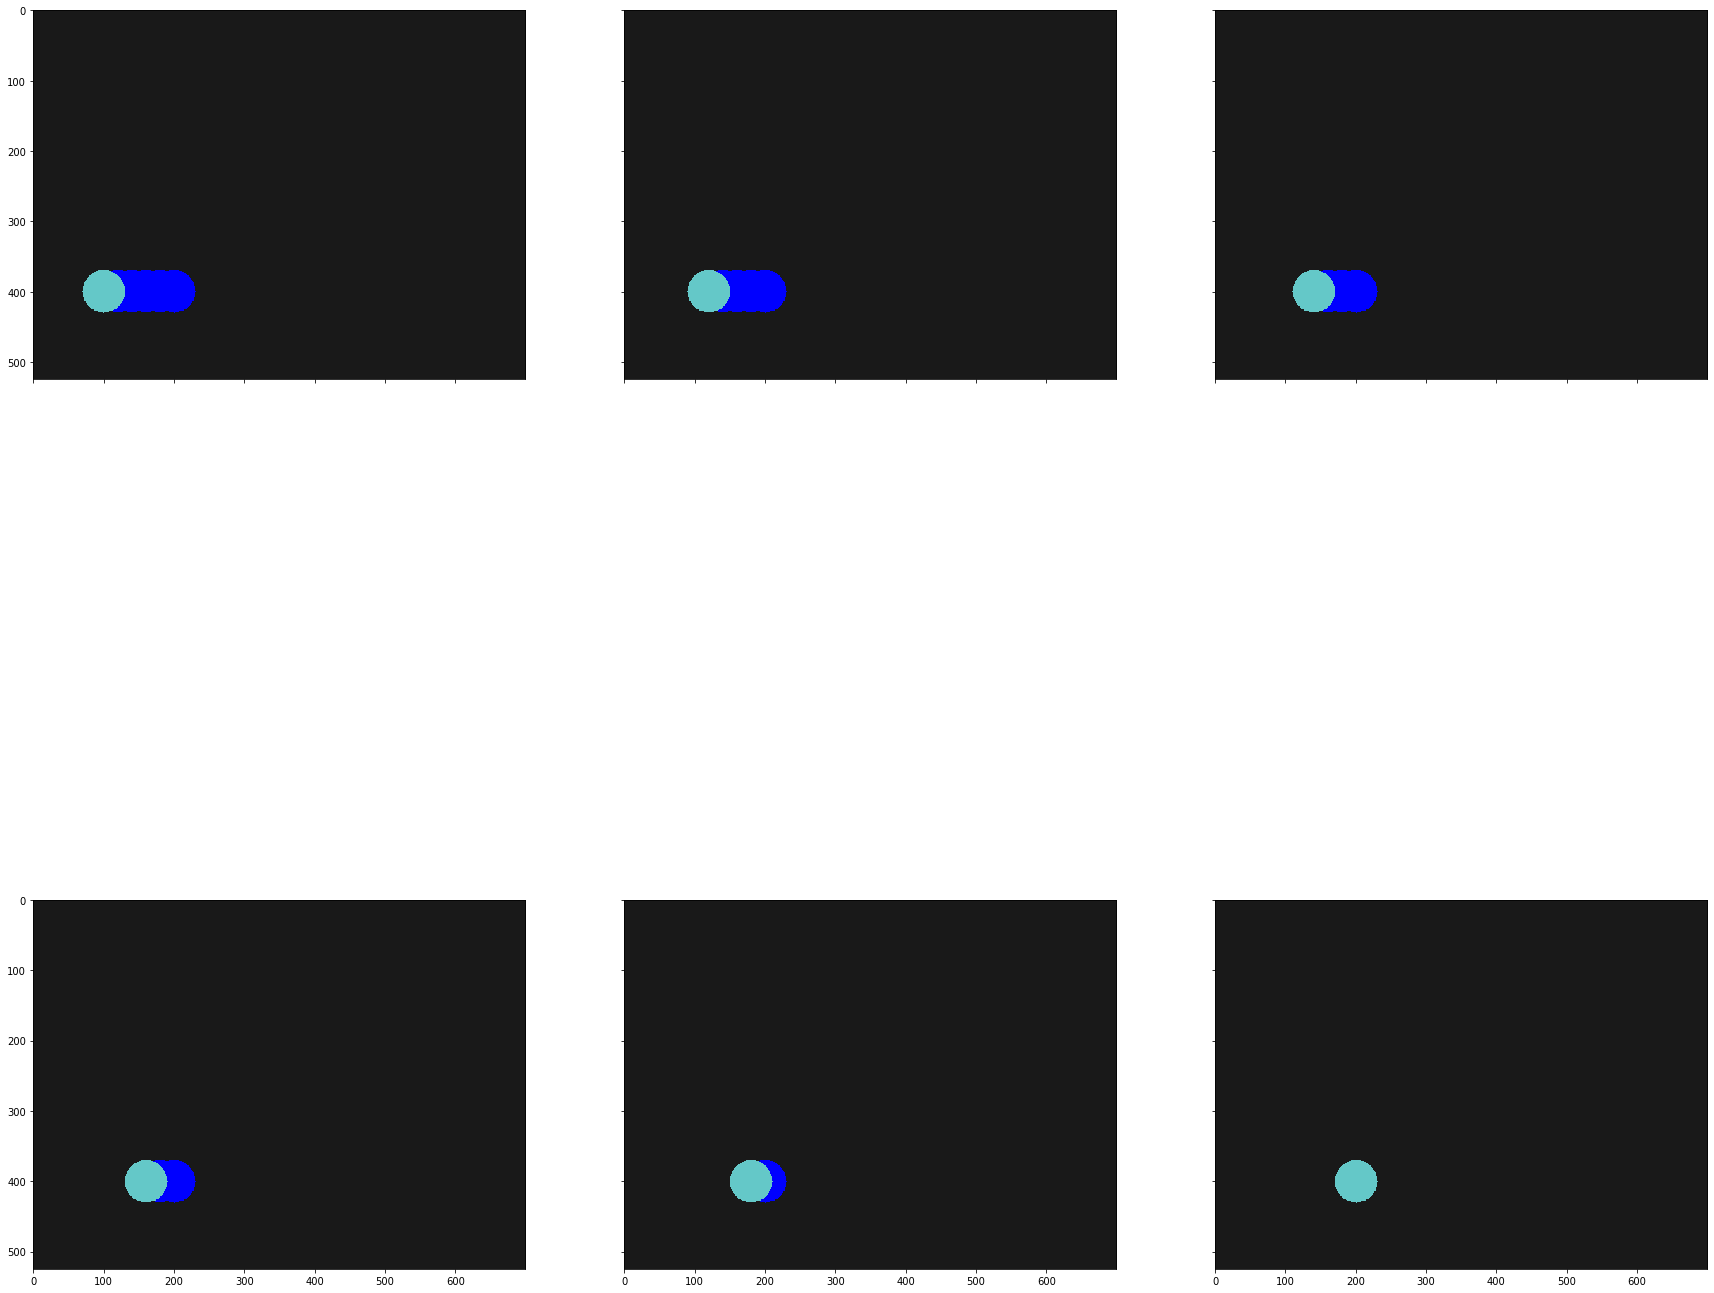

In [61]:
c = Canvas(vui=VUI())

print("Draw with normal pointer move.")
# draw the color first.
fig = plt.figure(figsize=(30, 30))
ax = fig.subplots(2, 3, sharex='col', sharey='row')
p = 0
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(c.update_window(mode="draw", pointer=(400, 100+p)))
        p+=20
plt.show()

print("Draw with slider move.")
# test the slider
fig = plt.figure(figsize=(30, 30))
ax = fig.subplots(2, 3, sharex='col', sharey='row')
p=0
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(c.update_window(mode="draw", pointer=(50+p, 10)))
        p+=20
plt.show()

print("Draw with new pointer.")
# Draw again the slider has increased
fig = plt.figure(figsize=(30, 30))
ax = fig.subplots(2, 3, sharex='col', sharey='row')
p = 0
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(c.update_window(mode="draw", pointer=(400, 100+p)))
        p+=20
plt.show()

print("Erase with new pointer.")
# erase it now
fig = plt.figure(figsize=(30, 30))
ax = fig.subplots(2, 3, sharex='col', sharey='row')
p = 0
for i in range(2):
    for j in range(3):
        ax[i][j].imshow(c.update_window(mode="erase", pointer=(400, 100+p)))
        p+=20
plt.show()

The test above is done on draw mode and erase with different pointer size. What have i done?
* Made a figure and subplots for 6 images.
* Draw a color on canvas at pointer position at different position.
* Make pointer position at slider region and made it move.
* Draw with new pointer size.
* Erase with new pointer size.

Test passed.

## Contour Writing
A class to perform overall operation using contours. I have worked hard to maintain the codes here by updating previous codes.

### Initialize: Contour Writing
Instead of using a distinct variable for each ROIs, i thought of using dictionaries to store particular property only. The keys of a dictionary will be ROI name and value will be the type of data to store.
```python
class ContourWriting:
    """
        A class to bind all other classes uses.
    """
    def __init__(self, count_mode=5, avg_frames=100, 
                 rois={"droi":[250, 400, 480, 681],
                       "mroi":[100, 10, 300, 225], 
                       "vroi":[150, 400, 240, 681]}, 
                 icons_dir="icons/", aweight=0.5):
        """
            count_mode: max count
            avg_frames: number of frames to take average
            rois: types of ROIS. Keys draw, move, vui and values [top, right, bottom, left]
            icons_dir: icons's directory
            aweight: value of delta on running average.
        
        
        """
        self.aweight = aweight
        self.avg_frames=avg_frames
        self.roi_boxes = rois
        self.roi_averages = {key:None for key in rois.keys()}
        self.roi_grays = {key:None for key in rois.keys()}
        self.roi_masks = {key:None for key in rois.keys()}
        self.roi_pointer = {key:None for key in rois.keys()}
        self.roi_counts = {key:None for key in rois.keys()}
        self.size = (525, 700)
        self.set_pointer()
        self.vui = VUI()
        self.canvas_shape = (self.size[0]-self.vui.vui_part, self.size[1], 3) 
    
        self.canvas = Canvas(window_size=self.canvas_shape, vui=self.vui)
        self.running_mode = self.vui.running_mode
        
        self.force_modes=None
        self.fcount_mode=count_mode
        self.fcurrent_count=0
        self.fprev_mode = "move"
        self.check_force_mode()
        
```

* `roi_averages`: to store average image of each roi.
* `roi_grays`: to store grayscale image of each roi.
* `roi_masks`: to store mask image of each roi.
* `roi_pointer`: to store pointer position on each roi.
* `roi_counts`: to store the counts of contour points on each roi.
* `set_pointer`: method to set pointer on respective position.
* `vui`: attribute to store object of `VUI` class.
* `canvas_shape`: must be below `vui_part`.
* `force_modes`: name of force modes from force or `mroi`.
* `check_force_mode`: method to perform check on `mroi`.

### Method: Main
A method to call from outside and handles all the tasks.

```python
    def main(self):
        cam = cv2.VideoCapture(0) 
        self.num_frames = 0
        self.take_average=True
        while True:
            (ret, frame) = cam.read()
            if ret:
                self.key = cv2.waitKey(1) & 0xFF
                frame = imutils.resize(frame, width=self.size[1])
                frame = cv2.flip(frame, 1)
                clone = frame.copy()
                gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
                self.set_grays(gray)
                self.size = frame.shape
                #print(self.roi_grays)
                
                # if to take average and num frames on average taking is lesser than 
                if self.num_frames<self.avg_frames and self.take_average==True:
                    self.running_average()
                    cv2.putText(clone, str(self.num_frames), (100, 100),
                                           cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
                    self.num_frames+=1
                else:
                    self.take_average=False
                    clone = self.find_contours(clone)
                    fmode = self.check_force_mode() 
                    vui = self.vui.update_vui(pointer=self.roi_pointer["vroi"], cpointer=self.roi_pointer["droi"])
                    if self.vui.hover is not None:
                        self.running_mode = self.vui.running_mode   
                    if  self.roi_counts["mroi"] is not None:
                        if self.roi_counts["vroi"] is not None:
                            if self.roi_counts["mroi"]-5 > self.roi_counts["vroi"] and fmode is not None:
                                self.running_mode = fmode
                            else:
                                self.running_mode = self.vui.running_mode       
                        else:
                            self.running_mode = fmode
                    self.perform_mode()
                    self.vui.running_mode=self.running_mode
                    canvas = self.canvas.update_window(mode=self.running_mode, 
                                                       pointer=self.roi_pointer["droi"]).astype(np.uint8)
                    final_window = self.get_window(canvas=canvas, vui=vui)
                    cv2.imshow("CW", final_window)
                    
                    self.roi_pointer["vroi"] = (-1, -1)
                    
                clone = self.make_rectangles(clone)
                cv2.imshow("Feed", clone)
                if self.key==27:
                    break
        cam.release()
        cv2.destroyAllWindows()

```
* Starts by initializing camera.
* Initialize `num_frames` to `0`, and `take_average` to `True`.
* While true perform below:
    * Read each frame and read success parameter.
    * If frame has been read, perform below:
        * Initialize key check.
        * Resize the frame and flip it to make it mirror effect.
        * Convert frame to graysclae and pass it to `set_grays()` method to find grayscale on each ROIs.
        * If `num_frames` is smaller than `avg_frames` and `take_average` is `True`,
            * Call `running_average()`.
            * Put frame number on frame.
            * Increase `num_frames`.
        * Else:
            * Set `take_average` to `False`.
            * Call `find_contours()` to get current contours.
            * Call `check_force_mode()` method to check on `mroi`.
            * Call `update_vui()` of VUI by passing it current pointer of VUI ROI and draw ROI.
            * If `hover` is not `None`:
                * Then set running mode to running mode of VUI.
            * If counts of contour points on `mroi` is greater than `vroi`'s then try to set running mode to force mode.
            * Else set running_mode to running mode of VUI.
            * Finally perfomr the mode action.
            * Set running mode of VUI to running mode.
            * Call `update_window()` of Canvas by passing it running mode and pointer of draw ROI.
            * Finally call `get_window()` method by passing current canvas and vui.
            * Show the current writing window.
            * Set ROI of VUI to (-1, -1) to prevent false pointer.
            * Call `make_rectangles()` to make rectangle for each ROIs.
        * Show `clone` image.
        * Exit loop on exit mode.
    * Release camera and destroy all windows.
            

### Method: Set Grays
```python
    def set_grays(self, gray_frame):
        """
            Takes current grayscale frame and sets roi_grays dictionary.
        """
        for rname, box in self.roi_boxes.items():
            top, right, bottom, left = box
            gray_roi = gray_frame[top:bottom, right:left]
            gray_roi=cv2.GaussianBlur(gray_roi, (7, 7), 0)
            self.roi_grays[rname] = gray_roi
```
* Loop through each bounding box of each ROI.
    * Take top, right, bottom, left coordinates of box and crop that region from grayscale frame.
    * Add some blur to that cropped region and add set it to `roi_grays` to corresponding `rname` key.

### Method: Running Average
A method to perform running average on every ROIs.
```python
    def running_average(self):
        for rname, roi in self.roi_averages.items():
            gimg = self.roi_grays[rname]
            if roi is None:
                roi = gimg.copy().astype("float")
            else:
                cv2.accumulateWeighted(gimg, roi, self.aweight)
            self.roi_averages[rname] = roi
```
* Take averages of each ROI and perform Running average.
* Set average value to `roi_averages`'s corresponding `rname` key.


### Method: Find Contours
```python
    def find_contours(self, clone, threshold=10):
        """
            A method to find contours on each ROIs, draw maximum contours and 
            then set pointer relative to VUI and Canvas.
            clone: current clone of frame.
            threshold: thresholding value.
        """
        self.roi_counts = {key:None for key in self.roi_counts.keys()}
        for rname, ravg in self.roi_averages.items():
            # abs diff betn img and bg
            top, right, bottom, left = self.roi_boxes[rname]
            diff = cv2.absdiff(ravg.astype("uint8"), self.roi_grays[rname])    
            _, th = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
            (cnts, _) = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            m = (-1, -1)
            if len(cnts)!=0:
                max_cnt = max(cnts, key=cv2.contourArea)
                cv2.drawContours(clone, [max_cnt+(right,top)], -1, (0, 0, 255))   
                sshape = max_cnt.shape
                new_segmented = max_cnt.reshape(sshape[0], sshape[-1])
                m = new_segmented.min(axis=0)
                cv2.circle(clone, (right+m[0], top+m[1]), 15, self.vui.pointer_color, -3)
                self.roi_counts[rname] = len(max_cnt)
                # translate m of this roi to window shape
                #if len(max_cnt)>10:    

                if rname!="mroi":
                    pshape = self.size
                    if rname=="vroi":
                        pshape = (self.vui.vui_part, self.vui.size[1])
                    if rname=="droi":
                        pshape = self.canvas_shape
                    h = bottom - top
                    l = left - right


                    m = (int((m[0]/l)*pshape[1]), int((m[1]/h)*pshape[0]))    
                else:
                    m = (right+m[0], top+m[1])
                       
                self.roi_pointer[rname]=(m[1], m[0])
                
        return clone  
```
A method to find contours on each ROIs, draw maximum contours and then set pointer relative to VUI and Canvas.
* Initialize roi_counts with keys as each ROIs and values as None.
* Loop through  average of each ROIs.
    * Take current gray of this ROI and find absolute difference.
    * Threshold the difference image to binary and find contours.
    * Set m to (-1, -1) initially.
    * If length of contours is greater then:
        * Find max contour and draw it on frame clone.
        * Find minimum point of contour and draw a pointer on that point.
        * Insert contour counts to each ROIs.
        * Perform pointer translation relative to mroi, vroi and droi.
    * Finally, set `roi_pointer` to each ROI.
* Return clone.

### Method: Check Force Mode
Note that we have 2 ROIs that can change the running mode but when to use which? Force mode is used from the `mroi` section and other modes are used from `vroi` section. 
```python
    def check_force_mode(self):
        top, right, bottom, left = self.roi_boxes["mroi"]
        if self.force_modes is None:
            x=np.linspace(right, left, 4).astype(np.int64)
            x=[(x[i],x[i+1]) for i in range(len(x)-1)]
            force_modes = ["move", "draw", "erase"]
            force_modes = {x[i]:force_modes[i] for i in range(len(x))}
            #print(force_modes)
            self.force_modes = force_modes
        elif self.roi_pointer["mroi"][0]>0:
            mpointer = self.roi_pointer["mroi"]
            
            for col, mode in self.force_modes.items():
                
                if col[0]<=mpointer[1]<col[1]:
                    #print(col, mpointer)
                    if self.fprev_mode==mode:
                        self.fcurrent_count+=1
                    else:
                        self.fcurrent_count=0
                        self.fprev_mode=mode
                    if self.fcurrent_count>=self.fcount_mode:
                        #print("f ", mode)
                        #self.fcurrent_count=0
                        
                        return mode
```
* Take a top, right, bottom, left from `mroi` key's value on `roi_boxes`.
* Then `foce_modes` is checked if is `None` or not.
    * Divide the ROI Box into parts equal to `force_modes`. By default use `move, draw, erase`.
    * Create a dictionary with column as key and value as mode name.
    * Set `force_modes` attribute.
* Else length of contours on `mroi` is greater than 0, then take pointer.
    * Loop through each columns, mode on `force_modes`: 
        * If the y coordinate of pointer is within the range of column for this mode then set do check previous and current mode.

### Method: Perform Mode
I have used 9 modes total. Until now, draw, erase, move, color have been used but now for remaining modes, we have to perform some action. Lets define a method for that too.
```python
    def perform_mode(self):
        if self.running_mode=="clear":
            self.canvas.clear()
            self.running_mode="move"
        if self.running_mode=="restart":
            self.take_average =True
            self.num_frames=0
            self.running_mode="move"
            self.canvas.clear()
        if self.running_mode=="save":
            #cv2.imshow("canvas", self.canvas.canvas.astype(np.uint8))
            cv2.imwrite("canvas.png", self.canvas.canvas.astype(np.uint8))
            #cv2.destroyWindow("canvas")
            self.running_mode="move"
        if self.running_mode=="exit":
            self.key=27
        if self.running_mode=="detect":
            self.running_mode="move"
            self.detector()
    
```
* If running mode is clear, then call the `clear()` method of `canvas`'s object.
* If running mode is restart, 
    * Set `take average=True`
    * Set `num_frames = 0`
    * Set `running_mode="move"`.
    * Call the `clear()` method of `canvas`'s object.
* If running mode is save:
    * Save current canvas draw on disk and change running mode to move.
* If running mode is exit, then change current key to 27.
* If running mode is detect, then change running mode to move and call detector method.

### Method: Detector
A method that takes current canvas and performs detection using detection model like OCR. For now, i am using Tesseract.
```python
    def detector(self):
        img = self.canvas.canvas.astype(np.uint8)
        op = pytesseract.image_to_string(img, lang="eng", nice="1")
        print("Detected: ", op)
```
* To install pytesseract is easy. But you have to install another installation file on windows to make it run.
* If you have any problems regarding installation of pytesseract then leave me mail or comment.


### Method: Get Window
A method that binds window of VUI and Canvas to make them look like one and return new window.
```python
    def get_window(self, canvas, vui):
        final_window = vui.copy()
        canvas_cpy = canvas.copy()
        vshape = vui.shape
        cshape = canvas.shape
        #print(self.running_mode)
        if self.running_mode == "color":
            # get part where color lies and make those part of canvas_bg black
            cp = self.vui.mode_pos[self.running_mode]
            canvas[:self.vui.dd_part[1]-self.vui.vui_part, cp[0]:cp[1]] = vui[self.vui.vui_part:self.vui.dd_part[1], cp[0]:cp[1]]
            
            
        final_window[self.vui.vui_part:, :] = canvas
        cp = self.roi_pointer["droi"]
        cp = (cp[1], cp[0]+self.vui.vui_part)
        point = self.canvas.point
        cv2.circle(final_window,  cp, point[0], self.canvas.pointer_color, point[1])
        return final_window
    
```
* A simple indexing will be enough to perform this operation.
* Take the canvas window(not the canvas itself) and vui window.
* If running mode is color, then there is dropdown to be shown.
    * Prepare the indices there lies only the dropdown of color.
* Assign the canvas to parts below the `vui_part` of VUI because, those parts includes icons.
* Finally draw the pointer on new window. It is not necessary though.
* Return the final window.

### Method: Make Rectangles
A method to make rectangles on the clone of frame so that we can notice where our finger is moving in front of the camera. Also this method will add text to each rectangles.

```python
    def make_rectangles(self, clone):
        # make rectangle for everything, add text on middle of it
        for rname, box in self.roi_boxes.items():
            cv2.putText(clone, f"Curr. Mode: {self.running_mode}", (400, 100),
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            top, right, bottom, left = box
            mid = int((top+bottom)/2), int((left+right)/2) 
            if rname == "droi":
                cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)
                cv2.putText(clone, rname, (mid[1], mid[0]),
                                       cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
            if rname == "mroi":
                
                cv2.rectangle(clone, (left, top), (int((left + right)/3), bottom), (0, 255, 0), 2)
                cv2.rectangle(clone, (int((left + right)/3), top), (2*int((left + right)/3), bottom), (0, 255, 0), 2)
                cv2.rectangle(clone, (2*int((left + right)/3), top), (right, bottom), (0, 255, 0), 2)
                cv2.putText(clone, str("Mv"), (int((right)/1), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(clone, str("Dr"), (int((left + right)/3), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(clone, str("Er"), (2*int((left + right)/3), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if rname == "vroi":
                gb_indices = int((left-right)/len(self.vui.modes))
                gb_indices = np.arange(right, left, gb_indices)
                gb_indices[-1] = gb_indices[-1]+1
                for i in range(len(gb_indices)-1):
                    _gleft = gb_indices[i]
                    _gright = gb_indices[i+1]
                    cv2.rectangle(clone, (_gleft, top), (_gright, bottom), (255, 0, 255), 3)
                    cv2.putText(clone, self.vui.modes[i][:2], (_gleft+2, int((top+bottom)/2)),
                                                       cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 255), 2)
        return clone
```
Simple operation is happening here.
* For each ROIs:
    * Take top, right, bottom, left then find midpoint of this box.
    * Draw the rectangle ofor each ROIs. And divide the Rectangle on parts if necessary.

### Test: Contour Writing
Combine everything and lets try to make our system run. We will create and object of class `ContourWriting` and call its `main()` method.

In [64]:
gw = ContourWriting(avg_frames=150, aweight=0.9)
gw.main()

Output should look like the video below.
<figure>
<video src = "Assets/slider_final.mp4" width="100%" controls autoplay loop> </video>
<figcaption style = "text-align:left; font-style:italic">Animation and New VUI</figcaption>
</figure> 

I am highly recommending you to tune your `max_count` variables around the VUI class and ContourWriting class if you are working on more noisy room. Above video was taken on night hence there are many flickering poins on frames but tuning the count values works fine.

Test passed.

## Finally
The final version of code should look like below.

In [62]:
class VUI:
    """
        A class for visual user interface. Recommended to use default parameters.
    """
    def __init__(self, icons_dir="icons/", window_size=(525, 700, 3), vui_part=20, max_count=15):
        """
            icons_dir: directory to use icons from.
            window_size: size of an vui window. Recommended to use equal of final window.
            vui_part: How much % of rows from top will be used to stack icons?
        
        """
        self.idir = icons_dir
        self.window = np.zeros(window_size).astype(np.uint8)
        self.size = window_size
        self.vui_part = int(vui_part/100 * self.size[0])
        self.dd_part = (self.vui_part, int(50/100 * self.size[0]))
        
        self.modes = [fname.split(".")[0] for fname in os.listdir(self.idir)]
        self.icon_size = (int(self.size[1]/len(self.modes)), self.vui_part) # c, r
        
        self.current_icons = []
        self.anim_scale = 0.5
        self.anim_color = [5, 15, 2]
        self.prev_mode = "move"
        self.current_mode = "move"
        self.running_mode = None 
        self.hover=None
        
        self.mode_count = 1
        self.max_count = max_count
        self.color_count = 1
        self.max_color = 5
        
        self.current_pointer = (100, 100)
        self.canvas_pointer = None
        
        self.draw_color = (0, 0, 255)
        self.previous_color = (0, 0, 255)
        self.current_color = (0, 0, 255)
        self.pointer_color = (100, 200, 200)
        self.point = (10, -3)
        self.colors=None
        
        self.icons = self.prepare_icons()
        self.get_window()
        
    def prepare_icons(self):
        """
            A method to prepare icons on initial frame.
            Method sets 4 new attributes.
            cols: List to store (y1, y2) of icon.
            icon_position: Dictionary to store (y1, y2) as key and corresponding image as value
            current_icons: A dictionary initialized with initial icons. Changed on every frame when cursor lies above it.
            mode_pos: Mode as key and its icon's (y1, y2) as value.
        """
        icons = []
        cols = np.linspace(0, self.size[1]-1, len(self.modes)+1).astype(np.int64)
        cols = [(cols[i], cols[i+1]) for i in range(len(cols)-1)]
        
        icon_pos = {}
        mode_pos = {}
        for i, image_name in enumerate(os.listdir(self.idir)):
            img = cv2.imread(self.idir+image_name)
            img = cv2.resize(img, (cols[i][1]-cols[i][0], self.vui_part))
            icon_pos[cols[i]] = img
            mode_pos[self.modes[i]] = cols[i]
        self.cols = cols   
        self.icon_position = icon_pos
        self.current_icons = icon_pos
        self.mode_pos = mode_pos
        
    def set_colors(self, col=None, new_colors=None):
        """
            A method to set colors when pointer lies above color icon.
            Initially used subset of {Red, Green, Blue}
            col:- column where current pointer lies.
            new_colors:- If to use other colors.
            
            Method returns list of available colors on dropdown menu. 
            Changes the draw color, pointer color upon condition meet.
        """
        # earlier pointer was clipped within the vui
        pointer = self.canvas_pointer
        pointer = (pointer[1], self.vui_part+ pointer[0])
        if new_colors is None:
            r = np.array([0, 0, 255])
            g = np.array([0, 255, 0])
            b = np.array([255, 0, 0])
            colors = [r, g, b]
            colors_new = [colors[i]+colors[i+1] for i in range(len(colors)-1)]
            colors.extend(colors_new)
            self.colors = colors
        else:
            self.colors = new_colors
        rows = np.linspace(self.dd_part[0], self.dd_part[1], len(self.colors)+1).astype(np.int64)
        rows = [(rows[i], rows[i+1]) for i in range(len(rows)-1)]
        self.color_pos = {}
        for row, color in zip(rows, colors):
            self.color_pos[row] = color
            if row[0]<=pointer[1]<row[1] and col[0]<=pointer[0]<col[1]:
                self.current_color = (color.tolist())
                if self.current_color == self.previous_color:
                    self.color_count+=1
                else:
                    self.previous_color=self.current_color
                    self.color_count = 1
                if self.color_count>=self.max_color:
                    self.draw_color=self.current_color
                self.pointer_color = (np.abs(np.array([200, 200, 100])-color).tolist())
            self.current_window[row[0]:row[1], col[0]:col[1]] = color
        
        return self.colors  
    def get_window(self):
        """
            A method to return a VUI window upon called. Sets pointer on VUI canvas.
        """
        self.current_window = np.zeros_like(self.window).astype(np.uint8)
        for col, img in self.current_icons.items():
            self.current_window[:self.vui_part, col[0]:col[1]] = img
        if self.running_mode == "color":
            self.set_colors(col=self.cols[self.modes.index("color")])
        if self.current_pointer is not None and self.current_pointer[0]>0:
            cv2.circle(self.current_window, (self.current_pointer[1], self.current_pointer[0]), self.point[0], self.pointer_color, self.point[1])
        
        return self.current_window
    def update_vui(self, pointer=(100, 100), cpointer=(10, 100)):
        """
            A method to update the entire VUI properties and state.
            pointer: Current pointer on VUI part.
            cpointer: Current pointer on Canvas.
            
            cpointer is useful when working with color mode.
        """
        self.current_pointer = pointer
        self.canvas_pointer = cpointer
        #print(pointer, canvas_pointer)
        current_icons = {}
        self.hover=None
        if pointer[0]<=self.vui_part:
            for col, mode in zip(self.cols, self.modes):
                icon = self.icon_position[col].copy()
                ishape = icon.shape
                
                #print(mode)
                if col[0]<pointer[1]<=col[1]:
                    # pointer is above this icon now animate it.
                    self.current_mode = mode
                    zeros_icon = np.zeros_like(icon).astype(np.uint8)
                    
                    f = self.anim_scale*self.mode_count
                    r = int(ishape[0] * f)
                    c = int(ishape[1] * f)
                    icon = cv2.resize(icon, (c, r))
                    if f > 1:
                        rd = int((r - ishape[0])/2)
                        cd = int((c - ishape[1])/2)
                        
                        zeros_icon[:, :] = icon[rd:ishape[0]+rd, cd:ishape[1]+cd] 
                    else:
                        rd = int((ishape[0] - r)/2)
                        cd = int((ishape[1] - c)/2)
                        rdd, cdd = 0, 0
                        if ishape[0]-rd-rd > r:
                            rdd=1
                        if ishape[1]-cd-cd > c:
                            cdd=1
                        #print(icon.shape, ishape, rd, abs(r-rd), cd, abs(c-cd))
                        zeros_icon[rd:ishape[0]-rd-rdd, cd:ishape[1]-cd-cdd] = icon[::] 
                            
                    current_icons[col] = zeros_icon.astype(np.uint8) + np.uint8(np.array(self.anim_color)*self.mode_count)
                    
                    
                    if self.prev_mode == self.current_mode:
                        self.mode_count += 1
                    else:
                        self.prev_mode = self.current_mode
                        self.mode_count = 1
                    if self.mode_count >= self.max_count:
                        self.running_mode = self.current_mode
                        self.mode_count = 1
                        self.hover = True
                        
                else:
                    current_icons[col] = icon
                
            self.current_icons = current_icons
        else:
            self.mode_count = 1
                    
        return self.get_window()
                
            
        
                  
# vui = VUI()
# #show(vui.window)
# vui.update_vui()
# vui.update_vui()
# vui.update_vui(pointer=(200, 100))
# vui.update_vui(pointer=(200, 100))

class Canvas:
    def __init__(self, window_size=(525, 700, 3), draw_color=(100, 100, 100), 
                 pointer_color=(0, 0, 0), bg_color=(25, 25, 25), mode="move", 
                 point=(10, -3), vui=None, ssize=(300, 50, 3)):
        """
            A method to initialize canvas.
            window_size: size of a canvas window.
            draw_color: drawing color in RGB.
            pointer_color: pointer color in RGB.
            bg_color: background color in RGB.
            mode: running mode.
            point: tuple of (pointer radius, thickness)
            vui: VUI object.
            ssize: Slider's size.
        
        """
        self.size=window_size
        self.draw_color=draw_color
        self.pointer_color = pointer_color
        self.bg_color = bg_color
        self.window = np.zeros(self.size, dtype=np.uint8)
        self.canvas= self.window.copy()+bg_color
        self.mode = mode
        self.pointer = None
        self.point = point
        self.current_window = self.window+self.canvas
        self.vui = vui
        self.ssize = ssize
        self.sregion = ()
        
    def slider(self, size=(300, 30, 3), spoint=50, scolor=(100, 55, 100)):
        """
            A method to change the pointer size by moving a slider.
            size: size of slider region.
            spoint: slider point, generally row position of pointer.
            scolor: slider color
        """
        swidth=10
        #swidth=int(5/50*spoint)
        #swidth = np.clip(swidth, 5, spoint)
        swindow=np.zeros(self.size).astype(np.uint8)
        swindow[:self.ssize[0], 0:self.ssize[1]] += np.uint8([255, 255, 255])  
        r1 = np.clip(spoint-swidth, swidth, self.ssize[0]-swidth)
        r2 = np.clip(spoint+swidth, swidth, self.ssize[0]-swidth)
        spoint = int(10/50 * spoint)
        #print(r1, r2, spoint)
        
        
        swindow[r1:r2, :self.ssize[1]] = scolor
        self.point=(spoint, self.point[1])
        #cv2.imshow("slider", swindow.astype(np.uint8))
        return swindow.astype(np.uint8)   
    def clear(self):
        self.window = np.zeros(self.size, dtype=np.uint8)
        self.canvas= self.window.copy()+self.bg_color
    def update_window(self, mode, pointer=(400, 100)):
        """
            mode: running mode
            pointer: where is pointer now?
        """
        self.mode = mode
        self.vui.mode=mode
        self.pointer = pointer
        self.draw_color=self.vui.draw_color
        self.pointer_color = self.vui.pointer_color
        #self.pointer = (np.clip(self.vui.vui_part, pointer[0], self.size[0]), pointer[1])
        #print("c", self.draw_color)
        swindow = np.zeros(self.size).astype(np.uint8)
        #print(pointer)
        if 0<pointer[0]<self.ssize[0] and 0<pointer[1]<self.ssize[1]:
            swindow=self.slider(spoint=pointer[0])
            self.mode = "move"
            #self.pointer = (pointer[0], pointer[1]+self.ssize[1])
            #self.pointer_color = self.bg_color
        if self.mode == "draw":
            cv2.circle(self.canvas, (self.pointer[1], self.pointer[0]), self.point[0], self.draw_color, self.point[1])
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        elif self.mode == "erase":
            cv2.circle(self.canvas, (self.pointer[1], self.pointer[0]), self.point[0], self.bg_color, self.point[1])
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        else:
            self.current_window = self.window+self.canvas+swindow
            cv2.circle(self.current_window, (self.pointer[1], self.pointer[0]), self.point[0], self.pointer_color, self.point[1])
            
        #show(self.canvas)
        #show(self.current_window)
        return self.current_window
    
class ContourWriting:
    """
        A class to bind all other classes uses.
    """
    def __init__(self, count_mode=10, avg_frames=100, 
                 rois={"droi":[200, 400, 430, 681],
                       "mroi":[80, 10, 150, 225], 
                       "vroi":[100, 400, 200, 681]}, 
                 icons_dir="icons/", aweight=0.5):
        """
            rois: types of ROIS(draw, move, vui)
        
        """
        self.aweight = aweight
        self.avg_frames=avg_frames
        self.roi_boxes = rois
        self.roi_averages = {key:None for key in rois.keys()}
        self.roi_grays = {key:None for key in rois.keys()}
        self.roi_masks = {key:None for key in rois.keys()}
        self.roi_pointer = {key:None for key in rois.keys()}
        self.roi_counts = {key:None for key in rois.keys()}
        self.size = (525, 700)
        self.set_pointer()
        self.vui = VUI()
        self.canvas_shape = (self.size[0]-self.vui.vui_part, self.size[1], 3) 
    
        self.canvas = Canvas(window_size=self.canvas_shape, vui=self.vui, bg_color=[255, 255, 255])
        self.running_mode = self.vui.running_mode
        
        self.force_modes=None
        self.fcount_mode=count_mode
        self.fcurrent_count=0
        self.fprev_mode = "move"
        self.check_force_mode()
        
        
    def set_pointer(self):
        for rname, pointer in self.roi_pointer.items():
            top, right, bottom, left = self.roi_boxes[rname]
            self.roi_pointer[rname] = (int((left+right)/2), int((top+bottom)/2))
    def running_average(self):
        for rname, roi in self.roi_averages.items():
            gimg = self.roi_grays[rname]
            if roi is None:
                roi = gimg.copy().astype("float")
            else:
                cv2.accumulateWeighted(gimg, roi, self.aweight)
            self.roi_averages[rname] = roi
    def set_grays(self, gray_frame):
        for rname, box in self.roi_boxes.items():
            top, right, bottom, left = box
            gray_roi = gray_frame[top:bottom, right:left]
            #gray_roi = cv2.bilateralFilter(gray_roi, 9, 15, 15)
            gray_roi=cv2.GaussianBlur(gray_roi, (7, 7), 0)
            self.roi_grays[rname] = gray_roi
            
    def make_rectangles(self, clone):
        cv2.putText(clone, f"Curr. Mode: {self.running_mode}", (self.roi_boxes["vroi"][1], self.roi_boxes["vroi"][0]-20),
                                       cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)           
        # make rectangle for everything, add text on middle of it
        for rname, box in self.roi_boxes.items():
            top, right, bottom, left = box
            mid = int((top+bottom)/2), int((left+right)/2) 
            if rname == "droi":
                cv2.rectangle(clone, (left, top), (right, bottom), (0, 255, 0), 2)
                cv2.putText(clone, rname, (mid[1], mid[0]),
                                       cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
            if rname == "mroi":
                
                cv2.rectangle(clone, (left, top), (int((left + right)/3), bottom), (0, 255, 0), 2)
                cv2.rectangle(clone, (int((left + right)/3), top), (2*int((left + right)/3), bottom), (0, 255, 0), 2)
                cv2.rectangle(clone, (2*int((left + right)/3), top), (right, bottom), (0, 255, 0), 2)
                cv2.putText(clone, str("Mv"), (int((right)/1), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(clone, str("Dr"), (int((left + right)/3), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                cv2.putText(clone, str("Er"), (2*int((left + right)/3), int((top+bottom)/2)),
                                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            if rname == "vroi":
                gb_indices = int((left-right)/len(self.vui.modes))
                gb_indices = np.arange(right, left, gb_indices)
                gb_indices[-1] = gb_indices[-1]+1
                for i in range(len(gb_indices)-1):
                    _gleft = gb_indices[i]
                    _gright = gb_indices[i+1]
                    cv2.rectangle(clone, (_gleft, top), (_gright, bottom), (255, 0, 255), 3)
                    cv2.putText(clone, self.vui.modes[i][:2], (_gleft+2, int((top+bottom)/2)),
                                                       cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 255), 2)
        return clone
    
    def find_contours(self, clone, threshold=10):
        self.roi_counts = {key:None for key in self.roi_counts.keys()}
        for rname, ravg in self.roi_averages.items():
            # abs diff betn img and bg
            top, right, bottom, left = self.roi_boxes[rname]
            diff = cv2.absdiff(ravg.astype("uint8"), self.roi_grays[rname])    
            _, th = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
            (cnts, _) = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            m = (-1, -1)
            if len(cnts)!=0:
                max_cnt = max(cnts, key=cv2.contourArea)
                cv2.drawContours(clone, [max_cnt+(right,top)], -1, (0, 0, 255))   
                sshape = max_cnt.shape
                new_segmented = max_cnt.reshape(sshape[0], sshape[-1])
                m = new_segmented.min(axis=0)
                cv2.circle(clone, (right+m[0], top+m[1]), 15, self.vui.pointer_color, -3)
                self.roi_counts[rname] = len(max_cnt)
                # translate m of this roi to window shape
                #if len(max_cnt)>10:    

                if rname!="mroi":
                    pshape = self.size
                    if rname=="vroi":
                        pshape = (self.vui.vui_part, self.vui.size[1])
                    if rname=="droi":
                        # make it self.canvas.shape
                        #pshape = (self.canvas_shape[0], self.canvas_shape[1]-self.canvas.ssize[1]) 
                        pshape=self.canvas_shape
                    h = bottom - top
                    l = left - right


                    m = (int((m[0]/l)*pshape[1]), int((m[1]/h)*pshape[0]))    
                else:
                    m = (right+m[0], top+m[1])
        
                self.roi_pointer[rname]=(m[1], m[0])
                
        return clone    
    
    def get_window(self, canvas, vui):
        final_window = vui.copy()
        canvas_cpy = canvas.copy()
        vshape = vui.shape
        cshape = canvas.shape
        #print(self.running_mode)
        if self.running_mode == "color":
            # get part where color lies and make those part of canvas_bg black
            cp = self.vui.mode_pos[self.running_mode]
            canvas[:self.vui.dd_part[1]-self.vui.vui_part, cp[0]:cp[1]] = vui[self.vui.vui_part:self.vui.dd_part[1], cp[0]:cp[1]]
            
            #show(canvas)
        #else:#
        final_window[self.vui.vui_part:, :] = canvas
        cp = self.roi_pointer["droi"]
        cp = (cp[1], cp[0]+self.vui.vui_part)
        point = self.canvas.point
        cv2.circle(final_window,  cp, point[0], self.canvas.pointer_color, point[1])
        return final_window
    
    def check_force_mode(self):
        top, right, bottom, left = self.roi_boxes["mroi"]
        if self.force_modes is None:
            x=np.linspace(right, left, 4).astype(np.int64)
            x=[(x[i],x[i+1]) for i in range(len(x)-1)]
            force_modes = ["move", "draw", "erase"]
            force_modes = {x[i]:force_modes[i] for i in range(len(x))}
            #print(force_modes)
            self.force_modes = force_modes
        elif self.roi_pointer["mroi"][0]>0:
            mpointer = self.roi_pointer["mroi"]
            
            for col, mode in self.force_modes.items():
                
                if col[0]<=mpointer[1]<col[1]:
                    #print(col, mpointer)
                    if self.fprev_mode==mode:
                        self.fcurrent_count+=1
                    else:
                        self.fcurrent_count=0
                        self.fprev_mode=mode
                    if self.fcurrent_count>=self.fcount_mode:
                        #print("f ", mode)
                        #self.fcurrent_count=0
                        
                        return mode
    def detector(self):
        img = self.canvas.canvas.astype(np.uint8)
        op = pytesseract.image_to_string(img, lang="eng", nice="1")
        print("Detected: ", op)
    def perform_mode(self):
        if self.running_mode=="clear":
            self.canvas.clear()
            self.running_mode="move"
        if self.running_mode=="restart":
            self.take_average =True
            self.num_frames=0
            self.running_mode="move"
            self.canvas.clear()
        if self.running_mode=="save":
            #cv2.imshow("canvas", self.canvas.canvas.astype(np.uint8))
            cv2.imwrite("canvas.png", self.canvas.canvas.astype(np.uint8))
            #cv2.destroyWindow("canvas")
            self.running_mode="move"
        if self.running_mode=="exit":
            self.key=27
        if self.running_mode=="detect":
            self.running_mode="move"
            self.detector()
    def main(self):
        cam = cv2.VideoCapture(0) 
        self.num_frames = 0
        self.take_average=True
        while True:
            (ret, frame) = cam.read()
            if ret:
                self.key = cv2.waitKey(1) & 0xFF
                frame = imutils.resize(frame, width=self.size[1])
                frame = cv2.flip(frame, 1)
                clone = frame.copy()
                gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)
                self.set_grays(gray)
                self.size = frame.shape
                
                # if to take average and num frames on average taking is lesser than 
                if self.num_frames<self.avg_frames and self.take_average==True:
                    self.running_average()
                    cv2.putText(clone, str(self.num_frames), (self.roi_boxes["mroi"][1], self.roi_boxes["mroi"][0]-5),
                                           cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
                    self.num_frames+=1
                else:
                    self.take_average=False
                    clone = self.find_contours(clone)
                    fmode = self.check_force_mode() 
                    #vui = self.vui.get_window()
                    vui = self.vui.update_vui(pointer=self.roi_pointer["vroi"], cpointer=self.roi_pointer["droi"])
                    if self.vui.hover is not None:
                        self.running_mode = self.vui.running_mode   
                    if  self.roi_counts["mroi"] is not None:
                        if self.roi_counts["vroi"] is not None:
                            if self.roi_counts["mroi"]-5 > self.roi_counts["vroi"] and fmode is not None:
                                self.running_mode = fmode
                            else:
                                self.running_mode = self.vui.running_mode       
                        else:
                            self.running_mode = fmode
                    self.perform_mode()
                    self.vui.running_mode=self.running_mode
                    canvas = self.canvas.update_window(mode=self.running_mode, 
                                                       pointer=self.roi_pointer["droi"]).astype(np.uint8)
                    final_window = self.get_window(canvas=canvas, vui=vui)
                    cv2.imshow("CW", final_window)
                    
                    self.roi_pointer["vroi"] = (-1, -1)
                    
                clone = self.make_rectangles(clone)
                cv2.imshow("Feed", clone)
                if self.key==27:
                    break
        cam.release()
        cv2.destroyAllWindows()

gw = ContourWriting(avg_frames=150, aweight=0.5)
gw.main()

I am going to point out features and shortcomings of this system now. 

### Codes
Codes to current version of the system is available on link below and if it is not, then hit the comment or leave me message (LinkedIn or Twitter or mail me).
* [Contour Based Writing](https://github.com/q-viper/Contour-Based-Writing/)

### Features
* A slider can be used to change size of pointer.
* Code is refactored and made OOP.
* Dual hand can be used to change modes draw/move/erase pointer.
* Color can be picked from dropdown like fashion. We can add as many color as we want.
* Total of 9 modes available.

### Shortcomings
Shortcomings are most helpful to find new feature on next version. Well here are plenty of them.
* The system is usable by contour of anything. Hence some gesture confirming model must be used.
* Also on above video, there can be seen pointer moving rapidly on the VUI regions. It is not always acceptable by users. Hence it must be eliminated soon.

### Ideas
* What if we can create a model that can classify gesture and we can define a certain gesture for certain mode?

## What Next?
I will try to solve shortcomings on next time. But i am interested to make this system run on mobile phones too. As per now, i am thinking of taking frames from device camera and process it. Then use some API call to get those frame. I might use Unity. I am highly excited to try using LSTMs and other state of the art Deep Learning Algorithms to make this system more awesome but i don't have internet access (other than cellular data) to do broad research.

### Why not read more?
* [Deploying a RASA Chatbot on Android using Unity3d](https://acharyaramkrishna.com.np/2020/08/04/deploying-a-simple-rasa-chatbot-on-unity3d-project-to-make-a-chatbot-for-android-devices/)
* [Gesture Based Visually Writing System Using OpenCV and Python](https://acharyaramkrishna.com.np/2020/08/01/gesture-based-visually-writing-system-using-opencv-and-python/)
* [Logistic Regression from Scratch](https://acharyaramkrishna.com.np/2020/08/11/writing-a-logistic-regression-class-from-scratch/)
* [Linear Regression from Scratch](https://acharyaramkrishna.com.np/2020/08/07/writing-a-linear-regression-class-from-scratch-using-python/)
* [Writing Popular ML Optimizers from Scratch](https://acharyaramkrishna.com.np/2020/06/05/writing-popular-machine-learning-optimizers-from-scratch-on-python/)
* [Feed Forward Neural Network from Scratch](https://acharyaramkrishna.com.np/2020/05/31/writing-a-deep-neural-network-from-scratch-on-python/)
* [Convolutional Neural Networks from Scratch](https://acharyaramkrishna.com.np/2020/06/05/convolutional-neural-networks-from-scratch-on-python/)
* [Writing a Simple Image Processing Class from Scratch](https://acharyaramkrishna.com.np/2020/05/31/image-processing-class-from-scratch-on-python/)
* [Naive Bayes for text classifications: Scratch to Framework](https://acharyaramkrishna.com.np/2020/03/04/text-classification-using-naive-bayes-scratch-to-the-framework/)
* [Simple OCR for Devanagari Handwritten Text](https://acharyaramkrishna.com.np/2020/02/25/building-ocr-for-devanagari-handwritten-character/)